In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 92% 137M/149M [00:01<00:00, 92.4MB/s]
100% 149M/149M [00:01<00:00, 111MB/s] 


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)


  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [ ]:
tr_df = get_class_paths("/content/Training")


In [ ]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0440.jpg,notumor
1,/content/Training/notumor/Tr-no_0722.jpg,notumor
2,/content/Training/notumor/Tr-no_1478.jpg,notumor
3,/content/Training/notumor/Tr-no_1053.jpg,notumor
4,/content/Training/notumor/Tr-no_1509.jpg,notumor
...,...,...
5707,/content/Training/pituitary/Tr-pi_0647.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0321.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_1066.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0753.jpg,pituitary


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0112.jpg,notumor
1,/content/Testing/notumor/Te-no_0118.jpg,notumor
2,/content/Testing/notumor/Te-no_0307.jpg,notumor
3,/content/Testing/notumor/Te-no_0145.jpg,notumor
4,/content/Testing/notumor/Te-no_0234.jpg,notumor
...,...,...
1306,/content/Testing/pituitary/Te-pi_0144.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0161.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0284.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0040.jpg,pituitary


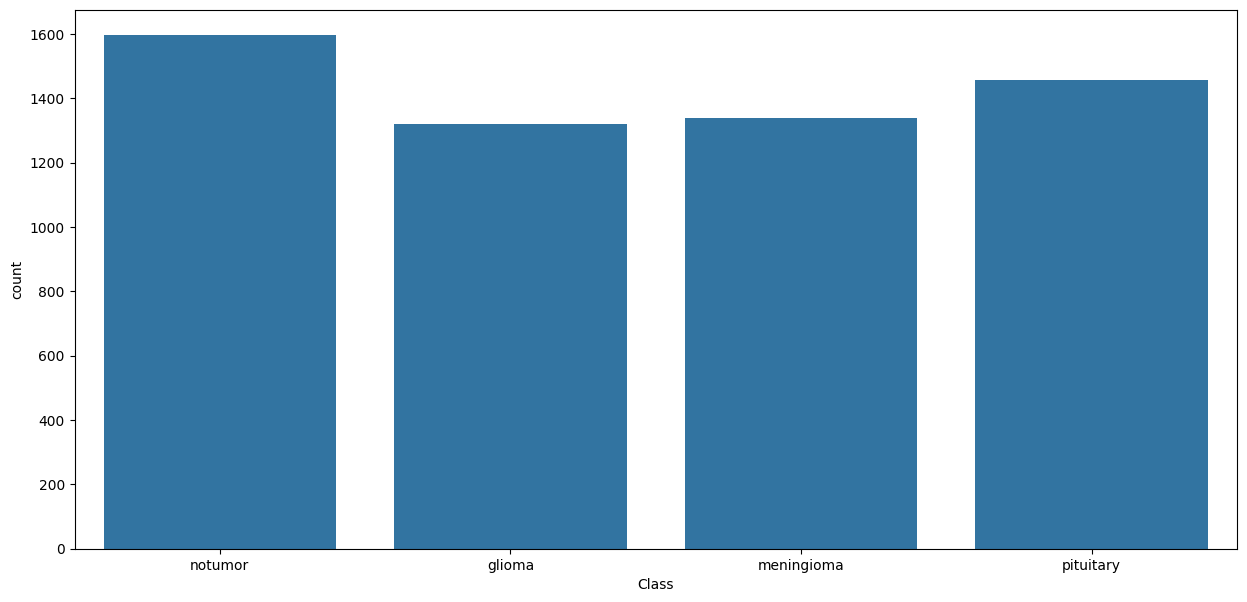

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

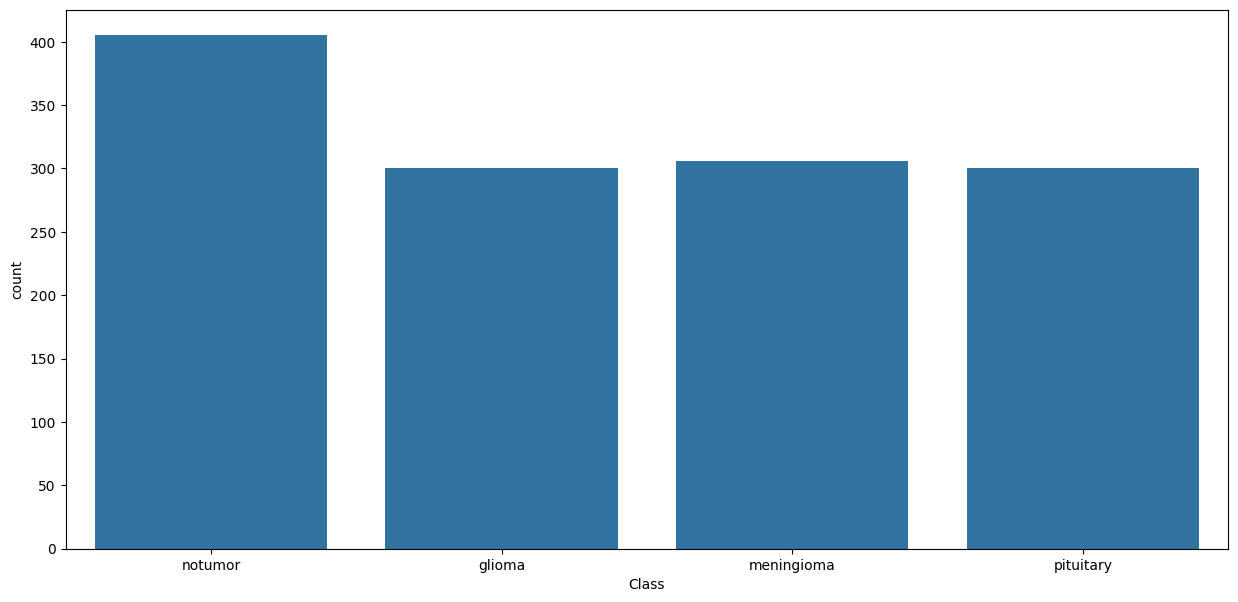

In [ ]:
plt.figure(figsize=(15,7))
ax= sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
172,/content/Testing/notumor/Te-no_0069.jpg,notumor
882,/content/Testing/meningioma/Te-me_0213.jpg,meningioma
1179,/content/Testing/pituitary/Te-pi_0093.jpg,pituitary
497,/content/Testing/glioma/Te-gl_0287.jpg,glioma
498,/content/Testing/glioma/Te-gl_0044.jpg,glioma
...,...,...
158,/content/Testing/notumor/Te-no_0100.jpg,notumor
267,/content/Testing/notumor/Te-no_0383.jpg,notumor
550,/content/Testing/glioma/Te-gl_0030.jpg,glioma
50,/content/Testing/notumor/Te-no_0048.jpg,notumor


In [ ]:
ts_df

,Class Path,Class
463,/content/Testing/glioma/Te-gl_0131.jpg,glioma
843,/content/Testing/meningioma/Te-me_0041.jpg,meningioma
148,/content/Testing/notumor/Te-no_0020.jpg,notumor
69,/content/Testing/notumor/Te-noTr_0005.jpg,notumor
318,/content/Testing/notumor/Te-no_0098.jpg,notumor
...,...,...
325,/content/Testing/notumor/Te-no_0317.jpg,notumor
326,/content/Testing/notumor/Te-no_0279.jpg,notumor
464,/content/Testing/glioma/Te-gl_0051.jpg,glioma
407,/content/Testing/glioma/Te-gl_0126.jpg,glioma


In [ ]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(
    rescale=1/255,
    brightness_range=(0.8, 1.2)
)

ts_gen = ImageDataGenerator(
    rescale=1/255
)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = batch_size,
    target_size=img_size
)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = batch_size,
    target_size=img_size
)

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = 16,
    target_size=img_size,
    shuffle = False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


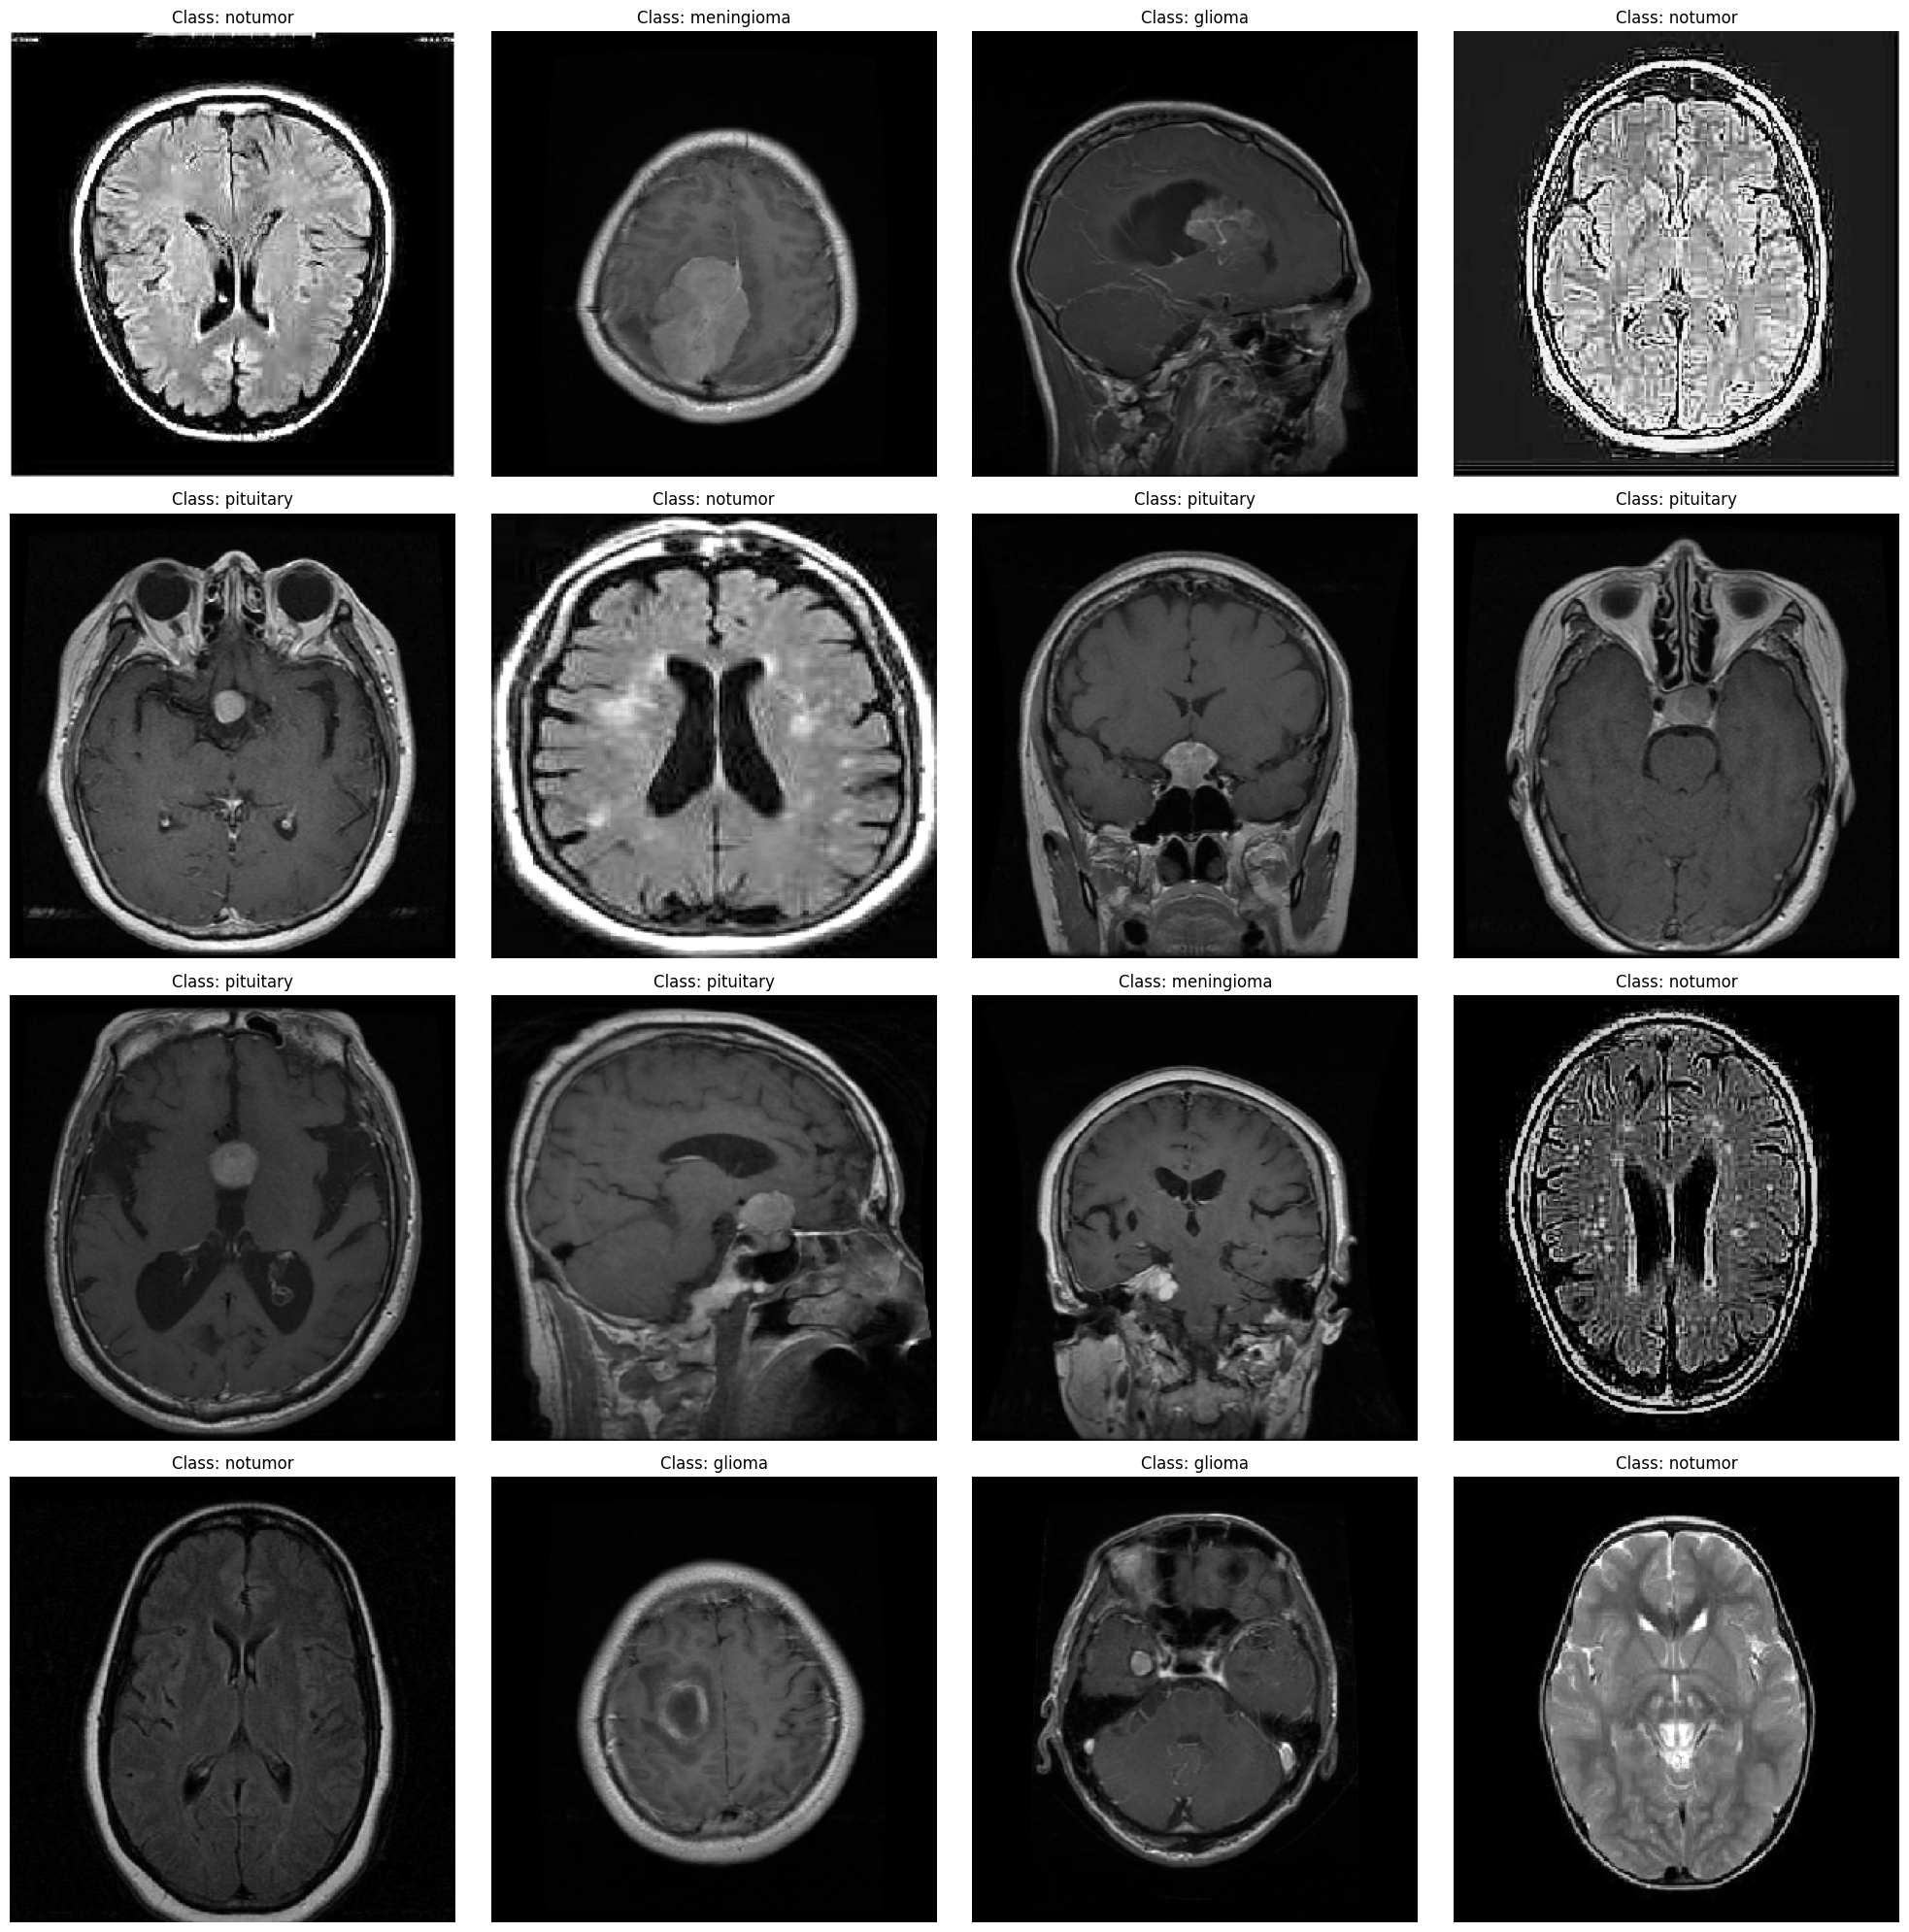

In [ ]:
#displays images in a subpolt labeled
plt.figure(figsize=(20,20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  #get class index
  class_index = np.argmax(label)

  #get the list of class names and class indicies
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  #find the index of class_index in the list of indicies
  index_position = class_indices.index(class_index)

  #get the class name
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()





In [ ]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top = False,
                                            weights = "imagenet",
                                            input_shape = img_shape,
                                            pooling = 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate = 0.3),
    Dense(128, activation = 'relu'),
    Dropout(rate = 0.25),
    Dense(4, activation = 'softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(Adamax(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy',
              Precision(),
              Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.6591 - loss: 0.8981 - precision: 0.7755 - recall: 0.4935 - val_accuracy: 0.9267 - val_loss: 0.2269 - val_precision: 0.9293 - val_recall: 0.9237
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 162s 821ms/step - accuracy: 0.9709 - loss: 0.0915 - precision: 0.9756 - recall: 0.9675 - val_accuracy: 0.9450 - val_loss: 0.1624 - val_precision: 0.9478 - val_recall: 0.9420
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 816ms/step - accuracy: 0.9901 - loss: 0.0440 - precision: 0.9908 - recall: 0.9893 - val_accuracy: 0.9847 - val_loss: 0.0445 - val_precision: 0.9847 - val_recall: 0.9847
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 826ms/step - accuracy: 0.9956 - loss: 0.0179 - precision: 0.9956 - recall: 0.9951 - val_accuracy: 0.9832 - val_loss: 0.0667 - val_precision: 0.9832 - val_recall: 0.9817
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 821ms/step - accuracy: 0.9962 - loss: 0.0157 - precision: 0.9965 - recall: 0.9962 - val_accuracy: 0.9847 - val_loss: 

<function matplotlib.pyplot.show(close=None, block=None)>

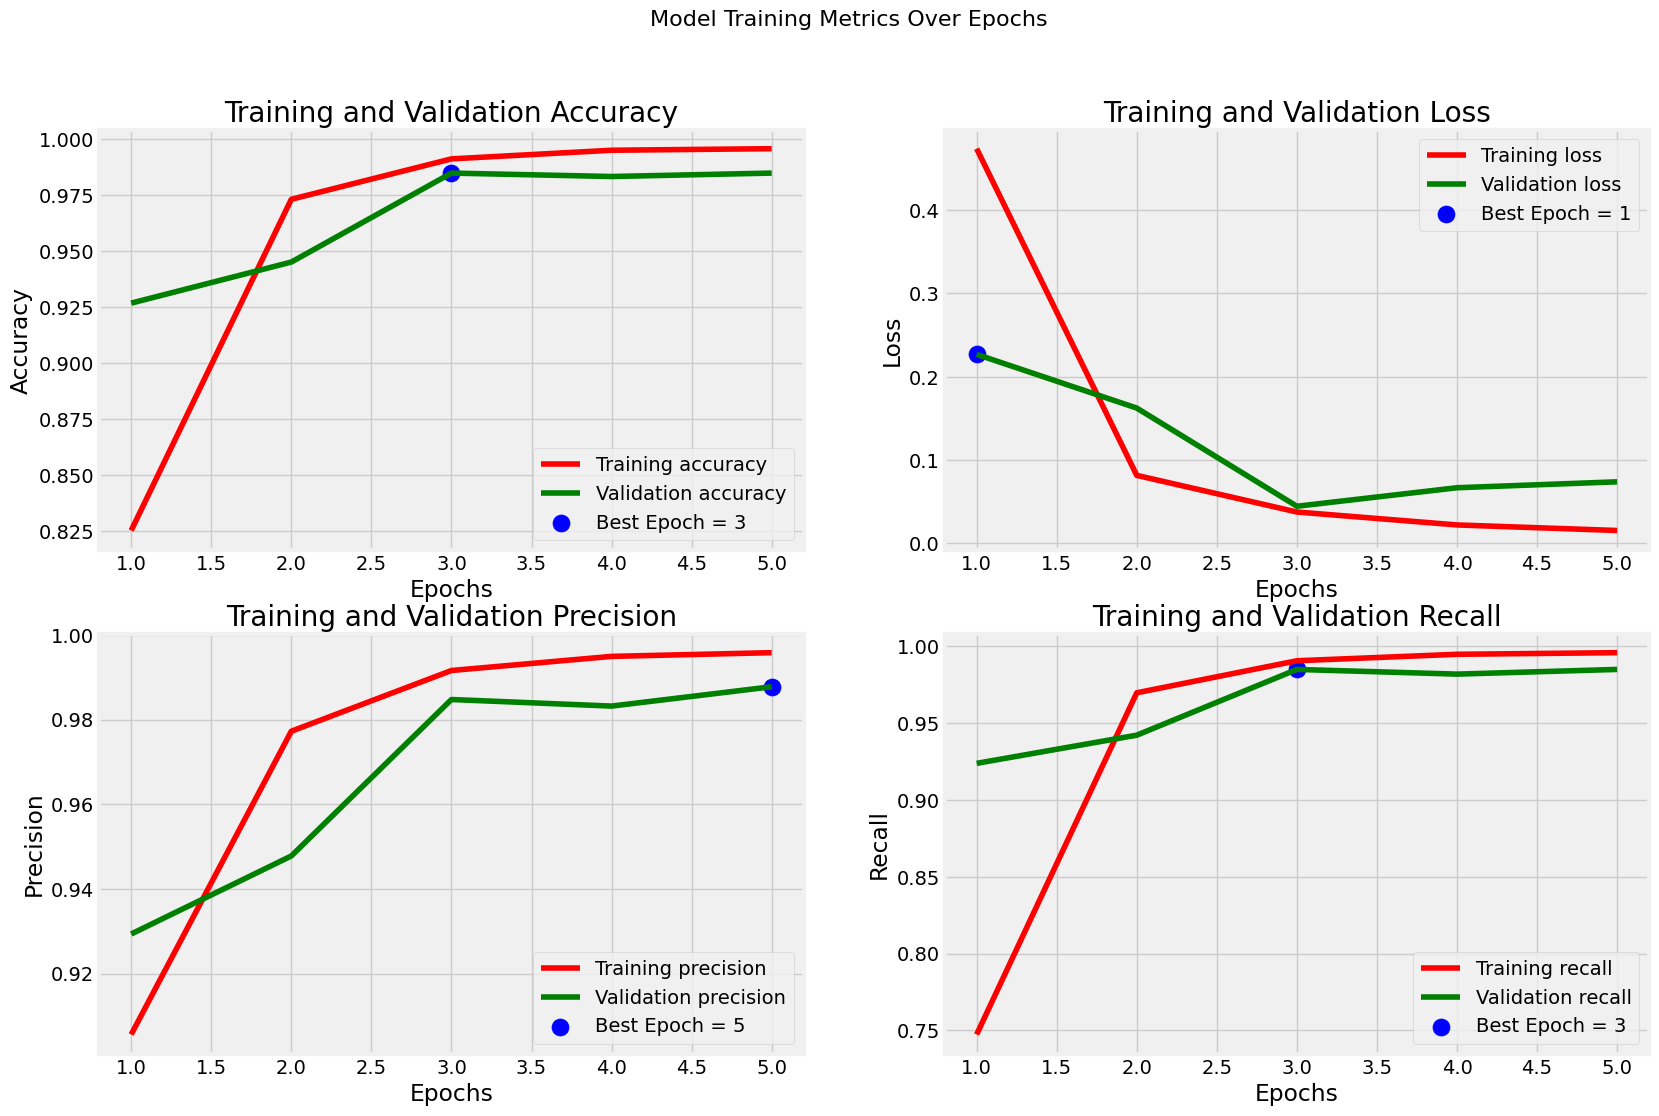

In [ ]:
#get training and validation metrics
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

#find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmax(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i , metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label = f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label = f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s = 150, c = 'blue', label = f'Best Epoch = {best_epochs[metric]}')


  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize = 16)
plt.show




In [ ]:
train_score = model.evaluate(tr_gen, verbose = 1)
valid_score = model.evaluate(valid_gen, verbose = 1)
test_score = model.evaluate(ts_gen, verbose = 1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}%")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}%")

179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 242ms/step - accuracy: 0.9974 - loss: 0.0082 - precision: 0.9981 - recall: 0.9974
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.9778 - loss: 0.1173 - precision: 0.9780 - recall: 0.9778
 1/41 ━━━━━━━━━━━━━━━━━━━━ 7s 195ms/step - accuracy: 1.0000 - loss: 0.0012 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9774 - loss: 0.1299 - precision: 0.9774 - recall: 0.9774
Train Accuracy: 99.84%
Train Loss: 0.0053


Validation Accuracy: 98.17%
Validation Loss: 0.0805%


Test Accuracy: 98.63%
Test Loss: 0.0603%


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step


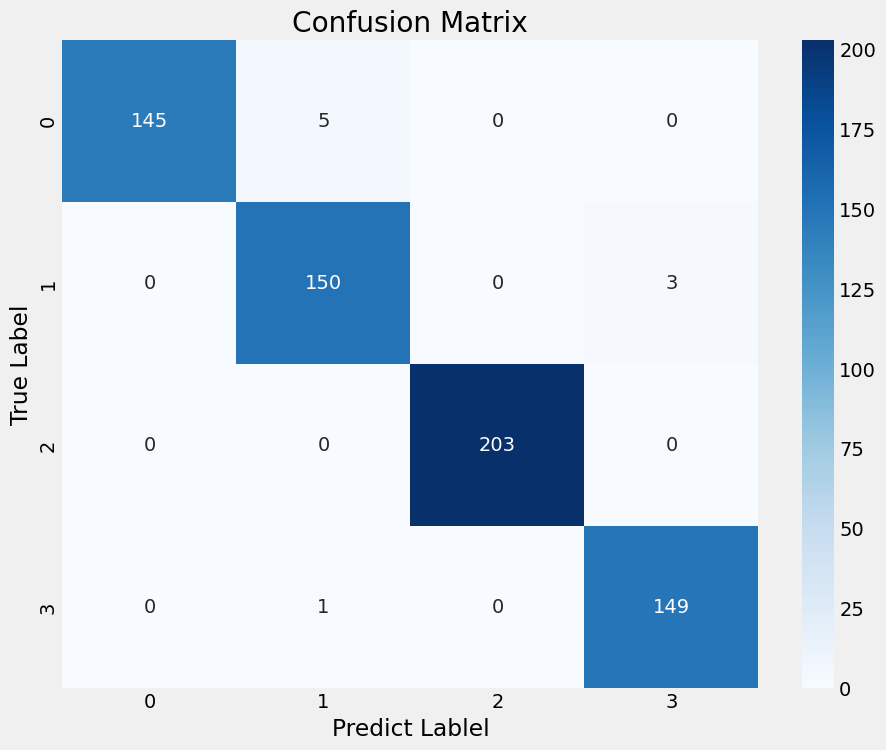

In [ ]:
preds = model.predict(ts_gen)
ypred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

#create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, ypred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predict Lablel')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
from PIL import Image

def predict(image_path: str) -> None:
    labels = list(class_dict.keys())

    plt.figure(figsize=(6, 8))

    img = Image.open(image_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    probabilities = list(prediction[0])

    predicted_class_idx = np.argmax(prediction)
    predicted_class = class_dict[predicted_class_idx]

    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Image MRI Image\nPredicted{predicted_class}")

    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize = 15)
    plt.title("Class Probabilities")

    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


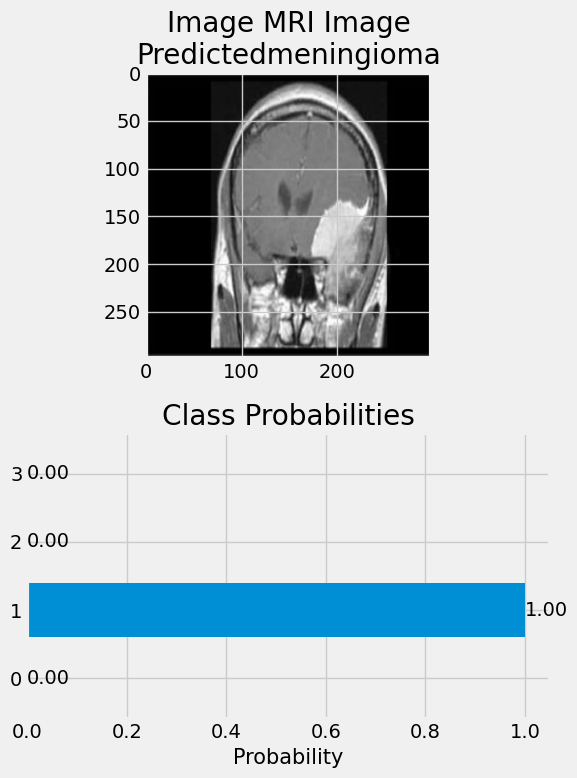


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


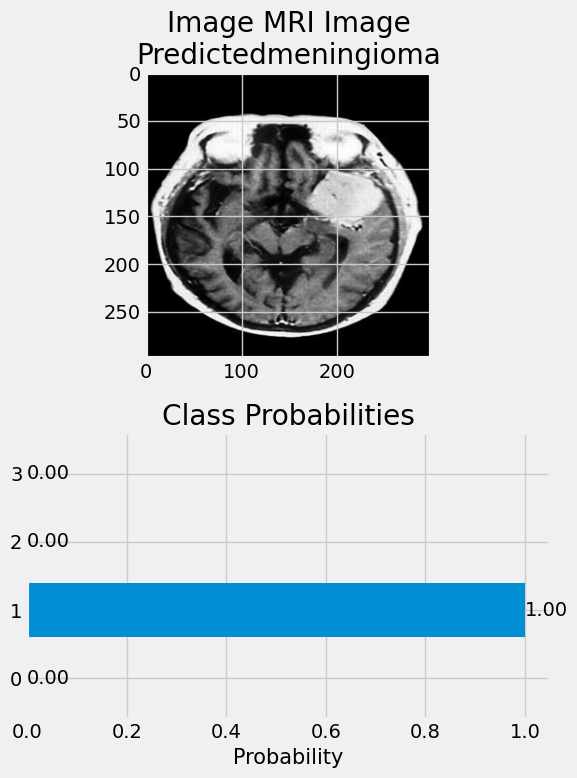


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


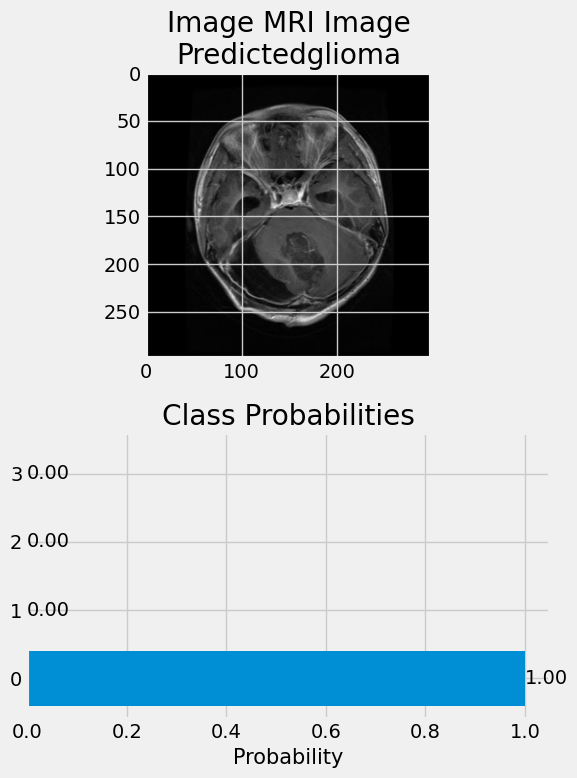


Predicted tumor type: glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save_weights("xception_model.weights.h5")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import Precision

In [ ]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(
    rescale=1/255,
    brightness_range=(0.8, 1.2)
)

ts_gen = ImageDataGenerator(
    rescale=1/255
)



tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = batch_size,
    target_size=img_size
)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = batch_size,
    target_size=img_size
)

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = 16,
    target_size=img_size,
    shuffle = False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224,224,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))

cnn_model.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy', Precision(), Recall()])

cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title Default title text
history = cnn_model.fit(tr_gen, epochs=10, validation_data=valid_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 153s 343ms/step - accuracy: 0.5681 - loss: 2.1276 - precision_1: 0.6900 - recall_1: 0.3888 - val_accuracy: 0.7221 - val_loss: 0.9379 - val_precision_1: 0.7703 - val_recall_1: 0.6504
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 158s 292ms/step - accuracy: 0.8065 - loss: 0.6922 - precision_1: 0.8317 - recall_1: 0.7711 - val_accuracy: 0.8305 - val_loss: 0.5963 - val_precision_1: 0.8544 - val_recall_1: 0.8061
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 105s 294ms/step - accuracy: 0.8691 - loss: 0.5174 - precision_1: 0.8834 - recall_1: 0.8508 - val_accuracy: 0.8626 - val_loss: 0.4817 - val_precision_1: 0.8698 - val_recall_1: 0.8366
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 292ms/step - accuracy: 0.9008 - loss: 0.4176 - precision_1: 0.9103 - recall_1: 0.8916 - val_accuracy: 0.8809 - val_loss: 0.4232 - val_precision_1: 0.8872 - val_recall_1: 0.8763
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 144s 299ms/step - accuracy: 0.9214 - loss: 0.3515 - precision_1: 0.9272 - recall_1:

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])


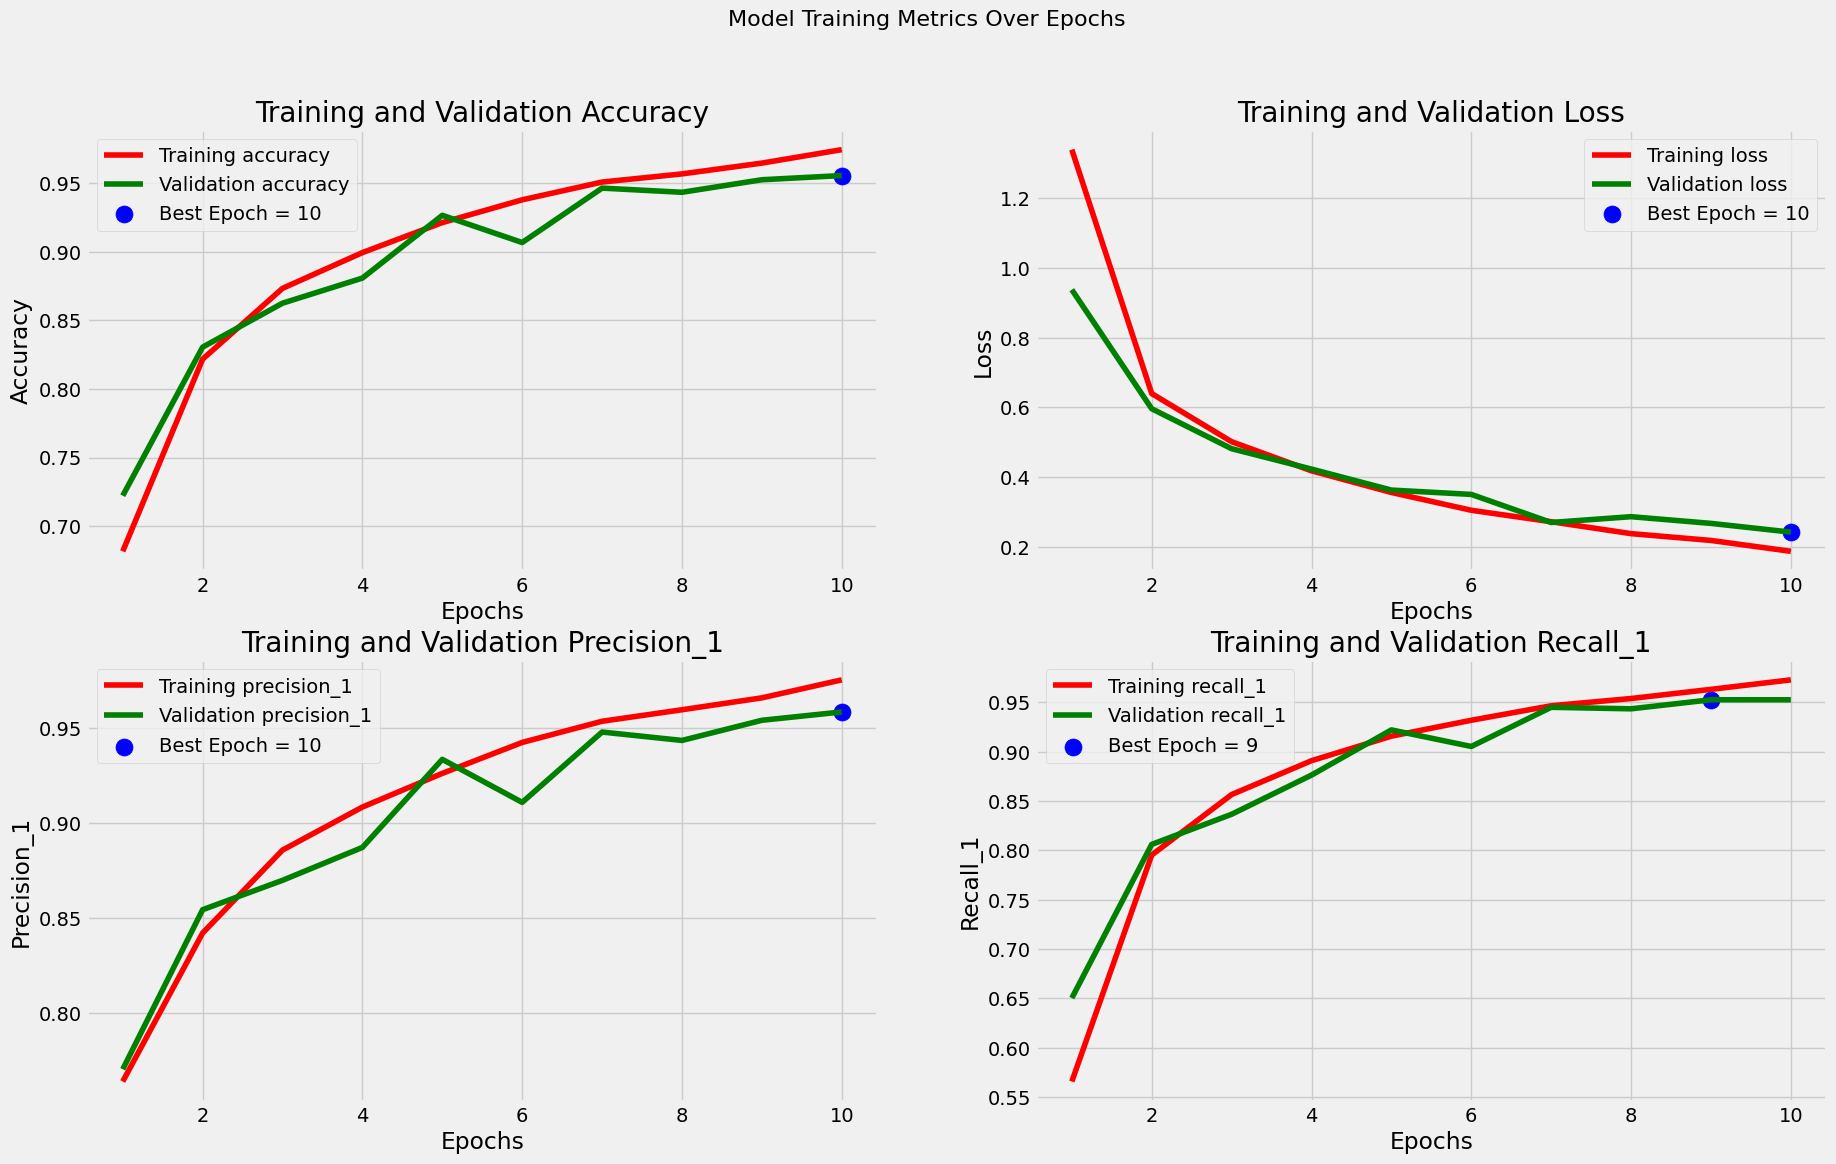

In [ ]:
# Update metrics to match the keys in history.history
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']

# Extract training and validation metrics
tr_metrics = {m: history.history.get(m) for m in metrics}
val_metrics = {m: history.history.get(f'val_{m}') for m in metrics}


# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':  # Minimize loss
        idx = np.argmin(val_metrics[m])
    else:  # Maximize other metrics
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best Epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose = 1)
valid_score = cnn_model.evaluate(valid_gen, verbose = 1)
test_score = cnn_model.evaluate(ts_gen, verbose = 1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}%")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}%")

357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.9909 - loss: 0.1421 - precision_1: 0.9910 - recall_1: 0.9903
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9512 - loss: 0.2348 - precision_1: 0.9565 - recall_1: 0.9506
 2/41 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 1.0000 - loss: 0.1437 - precision_1: 1.0000 - recall_1: 1.0000 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9823 - loss: 0.1841 - precision_1: 0.9823 - recall_1: 0.9823
Train Accuracy: 99.33%
Train Loss: 0.1396


Validation Accuracy: 95.88%
Validation Loss: 0.2338%


Test Accuracy: 97.41%
Test Loss: 0.2063%


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


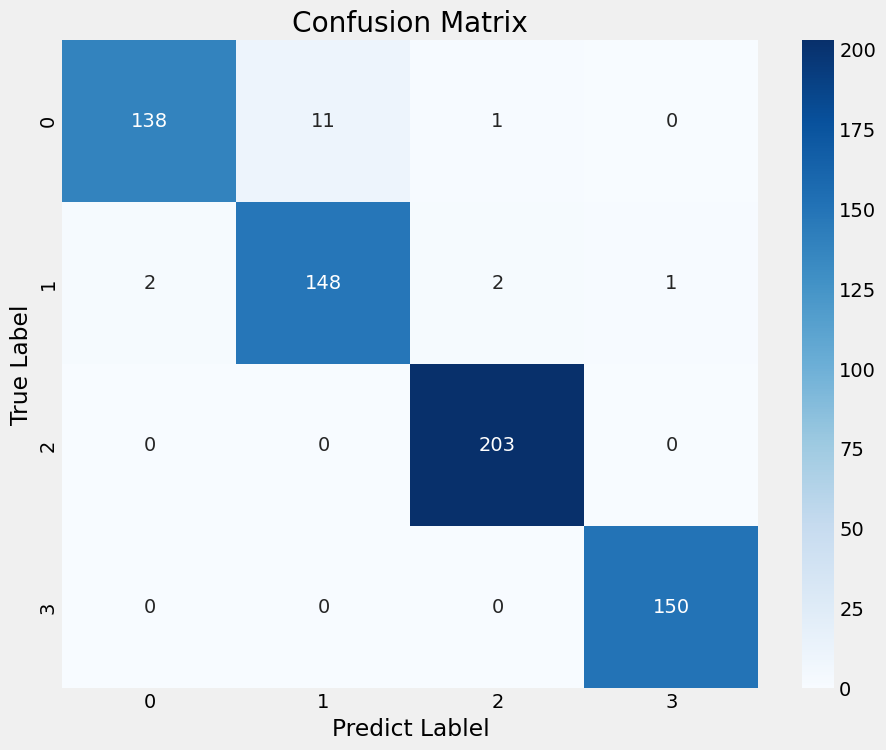

In [ ]:
preds = cnn_model.predict(ts_gen)
ypred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

#create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, ypred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predict Lablel')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
clr = classification_report(ts_gen.classes, ypred)
print(clr)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       150
           1       0.93      0.97      0.95       153
           2       0.99      1.00      0.99       203
           3       0.99      1.00      1.00       150

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656



In [ ]:
cnn_model.save("cnn_model.h5")

In [ ]:
! pip install streamlit pyngrok python-dotenv


In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata
import os

In [ ]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def load_xception_model(model_path):
    img_shape = (299, 299, 3)
    base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='relu')
    ])

    model.build((None,) + img_shape)

    model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

    model.load_weights(model_path)

    return model


def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=1)
  gradients = gradients.numpy().squeeze()

  #resize gradients to match img size
  gradients = cv2.resize(gradients, img_size)

  #create a circular mask for the brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0]) **2 + (y - center[1])**2 <= radius**2

  #apply masks to gradients
  gradients = gradients * mask

  #normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  #apply a higher threshold
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0

  #apply more aggresive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  #create a heatmap overlay with enhanced contrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  #resize heatmap to match orginal image size
  heatmap = cv2.resize(heatmap, img_size)

  #superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f'saliency_maps/{uploaded_file}'

  #save
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img







st.title('Brain Tumor Classification')

st.write("Upload an image of a brain scan MRI to classify")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    selected_model = st.radio(
        "Selected Model",
        ("Transfer Learning - Xception", "Custom CNN")
    )

    if selected_model == "Transfer Learning - Xception":
        model = load_xception_model('/content/xception_model.weights.h5')
        img_size = (299, 299)
    else:
        model = load_model('/content/cnn_model.h5')
        img_size = (224, 224)

    # Reload and process image
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction[0])
    result = label[class_index]

    st.write(f"Predicted Class: {result}")
    st.write("Predictions:")
    for label, prob in zip(labels, prediction[0]):
        st.write(f"{label}: {prob:.4f}")

    # Generate saliency map
    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)
    col1, col2 = st.columns(2)
    with col1:
        st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
    with col2:
        st.image(saliency_map, caption='Saliency Map', use_column_width=True)



Writing app.py


In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

NameError: name 'Thread' is not defined

In [ ]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print("Public Url:",  public_url)

Public Url: NgrokTunnel: "https://ff54-34-19-47-28.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing Tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)
